In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.datasets import get_data

In [2]:
income = get_data('income')
income2 = income.copy()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [3]:
income.info

<bound method DataFrame.info of        age         workclass   education  education-num      marital-status  \
0       39         State-gov   Bachelors             13       Never-married   
1       50  Self-emp-not-inc   Bachelors             13  Married-civ-spouse   
2       38           Private     HS-grad              9            Divorced   
3       53           Private        11th              7  Married-civ-spouse   
4       28           Private   Bachelors             13  Married-civ-spouse   
...    ...               ...         ...            ...                 ...   
32556   27           Private  Assoc-acdm             12  Married-civ-spouse   
32557   40           Private     HS-grad              9  Married-civ-spouse   
32558   58           Private     HS-grad              9             Widowed   
32559   22           Private     HS-grad              9       Never-married   
32560   52      Self-emp-inc     HS-grad              9  Married-civ-spouse   

              occup

In [4]:
income.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0
income >50K,32561.0,0.240810,0.427581,0.0,0.0,0.0,0.0,1.0


In [5]:
income.isna().sum()

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income >50K          0
dtype: int64

In [6]:
income_na = income[income.isna().any(axis=1)]

In [7]:
income_na

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K
14,40,Private,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,NaN,1
27,54,NaN,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,1
38,31,Private,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,NaN,1
51,18,Private,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,NaN,0
61,32,NaN,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,White,Male,0,0,40,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,NaN,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,1
32531,30,NaN,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,0
32539,71,NaN,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,1
32541,41,NaN,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,0


In [8]:
income_na_workclass = income_na[income_na['workclass'].isna()]
income_na_occupation = income_na[income_na['occupation'].isna()]
income_na_native_country = income_na[income_na['native-country'].isna()]
income_na_workclass_occupation = income_na_workclass.merge(income_na_occupation, how='inner')
income_na_workclass_native_country = income_na_workclass.merge(income_na_native_country, how='inner')
income_na_occupation_native_country = income_na_occupation.merge(income_na_native_country, how='inner')

In [9]:
income_na_workclass_occupation

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K
0,54,NaN,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,1
1,32,NaN,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,White,Male,0,0,40,NaN,0
2,25,NaN,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,0
3,25,NaN,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,0
4,25,NaN,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2979,35,NaN,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,1
2980,30,NaN,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,0
2981,71,NaN,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,1
2982,41,NaN,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,0


In [10]:
print(income_na_workclass.shape)
print(income_na_occupation.shape)
print(income_na_workclass_occupation.shape)
print(income_na_workclass_native_country.shape)
print(income_na_occupation_native_country.shape)

(1836, 14)
(1843, 14)
(2984, 14)
(27, 14)
(27, 14)


In [11]:
income_na_workclass_occupation

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K
0,54,NaN,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,1
1,32,NaN,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,White,Male,0,0,40,NaN,0
2,25,NaN,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,0
3,25,NaN,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,0
4,25,NaN,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2979,35,NaN,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,1
2980,30,NaN,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,0
2981,71,NaN,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,1
2982,41,NaN,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,0


In [12]:
workclas_na = income['workclass'].isna()
workclas_na = workclas_na.apply(lambda x: 0 if x == False else 1)
income.insert(2,column='workclass_na',value=workclas_na)

In [13]:
occupation_na = income['occupation'].isna()
occupation_na = occupation_na.apply(lambda x: 0 if x == False else 1)
income.insert(7,column='occupation_na',value=occupation_na)

In [14]:
income['workclass'].fillna('Private',inplace=True)
income['occupation'].fillna('Other-service',inplace=True)
income.dropna(axis=0,subset=['native-country'],how='any',inplace=True)

In [15]:
income.drop(columns=['capital-gain','capital-loss'],inplace=True)

In [16]:
income.dtypes

age                int64
workclass         object
workclass_na       int64
education         object
education-num      int64
marital-status    object
occupation        object
occupation_na      int64
relationship      object
race              object
sex               object
hours-per-week     int64
native-country    object
income >50K        int64
dtype: object

In [17]:
subsample = income.loc[np.random.permutation(income.index)[:4000]]

In [18]:
from pycaret.classification import * 
%time model = setup(data = subsample , target = 'income >50K', train_size=0.8, remove_outliers = True, use_gpu=True)

,Description,Value
0,session_id,1517
1,Target,income >50K
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(4000, 14)"
5,Missing Values,False
6,Numeric Features,2
7,Categorical Features,11
8,Ordinal Features,False
9,High Cardinality Features,False


Wall time: 3min 20s


In [19]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,pycaret.internal.tunable.TunableMLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [20]:
%time compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8299,0.8828,0.5861,0.6957,0.6346,0.5252,0.5294,0.5050
ridge,Ridge Classifier,0.8286,0.0000,0.5187,0.7279,0.6039,0.4989,0.5115,0.0150
catboost,CatBoost Classifier,0.8286,0.8828,0.5874,0.6927,0.6337,0.5232,0.5275,3.6820
lda,Linear Discriminant Analysis,0.8280,0.8776,0.5680,0.6994,0.6247,0.5150,0.5210,0.0410
gbc,Gradient Boosting Classifier,0.8273,0.8793,0.5473,0.7073,0.6146,0.5062,0.5145,0.5590
ada,Ada Boost Classifier,0.8240,0.8800,0.6043,0.6715,0.6343,0.5192,0.5216,0.2670
xgboost,Extreme Gradient Boosting,0.8214,0.8708,0.5875,0.6705,0.6249,0.5086,0.5113,1.7390
lightgbm,Light Gradient Boosting Machine,0.8194,0.8719,0.5758,0.6680,0.6170,0.5000,0.5033,0.1510
rf,Random Forest Classifier,0.8039,0.8538,0.5459,0.6346,0.5842,0.4574,0.4613,0.9050
et,Extra Trees Classifier,0.7891,0.8172,0.5473,0.5944,0.5684,0.4294,0.4311,0.9340


Wall time: 1min 43s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1517, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
%prun catboost = create_model('catboost', cross_validation= False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8362,0.8793,0.5876,0.6909,0.6351,0.5304,0.5333


         144863 function calls (138706 primitive calls) in 7.528 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    7.179    7.179    7.179    7.179 {method '_train' of '_catboost._CatBoost' objects}
        2    0.143    0.072    0.143    0.072 {built-in method gc.collect}
        1    0.012    0.012    0.012    0.012 {method '_calc_fstr' of '_catboost._CatBoost' objects}
     4137    0.011    0.000    0.011    0.000 generic.py:10(_check)
       20    0.006    0.000    0.006    0.000 {method '_get_metrics_evals' of '_catboost._CatBoost' objects}
    18981    0.005    0.000    0.017    0.000 {built-in method builtins.isinstance}
       68    0.005    0.000    0.006    0.000 missing.py:235(_isna_string_dtype)
       62    0.005    0.000    0.005    0.000 socket.py:432(send)
12901/10959    0.004    0.000    0.023    0.000 {built-in method builtins.getattr}
        3    0.004    0.001    0.013    0.004 {method '_init

In [22]:
subsample_dummies = pd.get_dummies(subsample)

In [23]:
x = subsample_dummies.drop(columns = 'income >50K')
y = subsample_dummies['income >50K']

In [24]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'columns':df.columns, 'importance':m.feature_importances_}
                       ).sort_values('importance', ascending=False)

In [25]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,shuffle=False)

In [26]:
catboost = CatBoostClassifier().fit(x_train, y_train)
catboost.score(x_test, y_test)

Learning rate set to 0.015991
0:	learn: 0.6809566	total: 4.14ms	remaining: 4.13s
1:	learn: 0.6683494	total: 7.53ms	remaining: 3.76s
2:	learn: 0.6554230	total: 9.82ms	remaining: 3.26s
3:	learn: 0.6432079	total: 12.6ms	remaining: 3.15s
4:	learn: 0.6327472	total: 15.1ms	remaining: 3.01s
5:	learn: 0.6213061	total: 17.7ms	remaining: 2.93s
6:	learn: 0.6103719	total: 20.3ms	remaining: 2.87s
7:	learn: 0.5998995	total: 23.8ms	remaining: 2.95s
8:	learn: 0.5913075	total: 26.2ms	remaining: 2.88s
9:	learn: 0.5812416	total: 28.6ms	remaining: 2.83s
10:	learn: 0.5714864	total: 34ms	remaining: 3.05s
11:	learn: 0.5634874	total: 36.6ms	remaining: 3.01s
12:	learn: 0.5549314	total: 39.1ms	remaining: 2.97s
13:	learn: 0.5474638	total: 41.6ms	remaining: 2.93s
14:	learn: 0.5407602	total: 44.3ms	remaining: 2.91s
15:	learn: 0.5329421	total: 47.2ms	remaining: 2.9s
16:	learn: 0.5264365	total: 49.6ms	remaining: 2.87s
17:	learn: 0.5208022	total: 52.3ms	remaining: 2.85s
18:	learn: 0.5150464	total: 54.8ms	remaining: 2

0.8291666666666667

In [27]:
len(catboost.feature_importances_)

102

In [28]:
catboost.feature_importances_

array([2.14011160e+01, 2.72201439e-01, 1.35340008e+01, 2.48582942e-01,
       1.01351406e+01, 3.72044038e-01, 8.34989278e-01, 2.35205021e-03,
       1.62438379e+00, 7.97624707e-01, 1.63178629e+00, 5.08388761e-01,
       1.22243278e-05, 8.37201723e-02, 4.53061310e-02, 2.93516269e-01,
       5.14520378e-03, 1.37658573e-01, 3.73677860e-01, 1.25087739e-02,
       3.92547962e-01, 4.14291110e-01, 5.52388182e-01, 3.72930816e-02,
       5.15714954e-01, 3.83556515e-01, 2.20485487e-04, 3.37941384e-01,
       5.13005421e-01, 9.93283162e-01, 6.93258831e-03, 1.26152217e+01,
       1.25995452e-01, 1.12988773e+00, 6.02722569e-01, 1.96885273e-01,
       1.80778744e-01, 1.75896126e-03, 6.80977605e-01, 2.14647469e+00,
       1.53848827e+00, 9.06266073e-01, 7.38567917e-01, 4.51561284e+00,
       3.62867974e-02, 1.34101240e+00, 1.15723923e-01, 7.47000639e-01,
       5.23824812e-01, 3.43334792e-01, 3.42956573e+00, 8.45750358e-01,
       3.58321903e-01, 1.63052103e+00, 6.69949696e-01, 1.12448580e+00,
      

In [29]:
feature_importance = rf_feat_importance(catboost, x);
feature_importance

,columns,importance
0,age,2.140112e+01
2,education-num,1.353400e+01
31,marital-status_Married-civ-spouse,1.261522e+01
4,hours-per-week,1.013514e+01
43,occupation_Other-service,4.515613e+00
...,...,...
77,native-country_Holand-Netherlands,1.435542e-06
76,native-country_Haiti,1.198033e-07
82,native-country_Ireland,0.000000e+00
78,native-country_Hong,0.000000e+00


In [30]:
feature_importance = feature_importance[feature_importance.importance > 0.005]

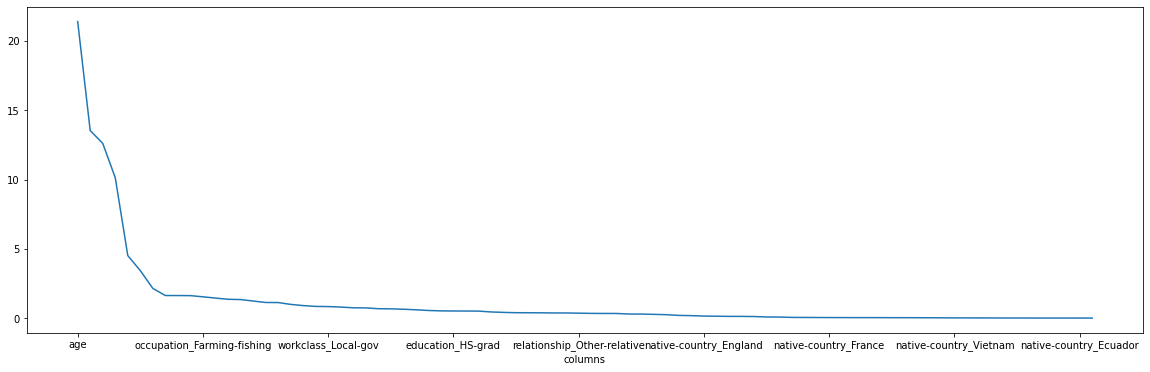

In [31]:
feature_importance.plot('columns', 'importance', figsize=(20,6), legend=False);

In [32]:
keep_columns = feature_importance[feature_importance["importance"]>0.005]["columns"]; 
len(keep_columns)

82

In [33]:
keep_columns

0                                   age
2                         education-num
31    marital-status_Married-civ-spouse
4                        hours-per-week
43             occupation_Other-service
                    ...                
30     marital-status_Married-AF-spouse
63              native-country_Cambodia
16                    education_1st-4th
69               native-country_Ecuador
70           native-country_El-Salvador
Name: columns, Length: 82, dtype: object

In [34]:
df_keep = subsample_dummies[keep_columns]
x = df_keep
y = subsample_dummies['income >50K']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,shuffle=False)

In [35]:
catboost2 = CatBoostClassifier().fit(x_train, y_train)
catboost2.score(x_test, y_test)

Learning rate set to 0.015991
0:	learn: 0.6803293	total: 2.32ms	remaining: 2.31s
1:	learn: 0.6683231	total: 5.18ms	remaining: 2.58s
2:	learn: 0.6548023	total: 7.8ms	remaining: 2.59s
3:	learn: 0.6439652	total: 10.6ms	remaining: 2.65s
4:	learn: 0.6331842	total: 13ms	remaining: 2.59s
5:	learn: 0.6210545	total: 15.8ms	remaining: 2.62s
6:	learn: 0.6116953	total: 18.9ms	remaining: 2.68s
7:	learn: 0.6011865	total: 21.9ms	remaining: 2.72s
8:	learn: 0.5915070	total: 24.3ms	remaining: 2.68s
9:	learn: 0.5838073	total: 26.7ms	remaining: 2.64s
10:	learn: 0.5764907	total: 29.4ms	remaining: 2.64s
11:	learn: 0.5689282	total: 31.9ms	remaining: 2.63s
12:	learn: 0.5608645	total: 34.7ms	remaining: 2.63s
13:	learn: 0.5525206	total: 38.3ms	remaining: 2.7s
14:	learn: 0.5453590	total: 40.8ms	remaining: 2.68s
15:	learn: 0.5370888	total: 43.3ms	remaining: 2.66s
16:	learn: 0.5301738	total: 46.2ms	remaining: 2.67s
17:	learn: 0.5239351	total: 49ms	remaining: 2.67s
18:	learn: 0.5171302	total: 55.2ms	remaining: 2.85

0.8283333333333334

In [36]:
len(catboost2.feature_importances_)

82

In [37]:
catboost2.feature_importances_

array([2.08361599e+01, 1.33302089e+01, 1.36257856e+01, 1.07488966e+01,
       4.32855788e+00, 4.14907414e+00, 1.84485954e+00, 1.71931689e+00,
       1.48958268e+00, 1.30035310e+00, 1.49887210e+00, 1.36398896e+00,
       8.94768289e-01, 1.18031184e+00, 1.12005403e+00, 1.02879444e+00,
       1.27036626e+00, 9.53967366e-01, 8.91327412e-01, 1.05920565e+00,
       8.71043022e-01, 8.00133356e-01, 6.79665659e-01, 8.31057189e-01,
       5.88958164e-01, 5.81747953e-01, 8.70752663e-01, 4.81358522e-01,
       5.89023371e-01, 5.31016577e-01, 5.97465723e-01, 5.54306213e-01,
       4.58026196e-01, 3.47716873e-01, 5.29912554e-01, 3.60922966e-01,
       4.37226468e-01, 4.23420275e-01, 3.27980457e-01, 1.96981474e-01,
       3.82623896e-01, 3.59614949e-01, 3.11207878e-01, 3.71409103e-01,
       3.47123065e-01, 2.28918697e-01, 4.70329840e-01, 2.25253585e-01,
       1.77107238e-01, 1.71928312e-01, 1.32302791e-01, 1.40875359e-01,
       1.10596306e-01, 1.14048817e-01, 7.18968926e-02, 1.80833506e-02,
      

In [38]:
feature_importance = rf_feat_importance(catboost2, x);
feature_importance

,columns,importance
0,age,20.836160
2,marital-status_Married-civ-spouse,13.625786
1,education-num,13.330209
3,hours-per-week,10.748897
4,occupation_Other-service,4.328558
...,...,...
76,native-country_Scotland,0.007195
80,native-country_Ecuador,0.005602
78,native-country_Cambodia,0.005063
79,education_1st-4th,0.004536


In [39]:
df_keep = subsample_dummies[keep_columns]
df_keep.drop(columns=['age','education-num','marital-status_Married-civ-spouse','hours-per-week'], axis=1, inplace=True)
x = df_keep
y = subsample_dummies['income >50K']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,shuffle=False)

In [40]:
catboost3 = CatBoostClassifier().fit(x_train, y_train)
catboost3.score(x_test, y_test)

Learning rate set to 0.015991
0:	learn: 0.6824863	total: 2.1ms	remaining: 2.1s
1:	learn: 0.6719651	total: 4.7ms	remaining: 2.35s
2:	learn: 0.6610574	total: 7.18ms	remaining: 2.39s
3:	learn: 0.6525547	total: 9.77ms	remaining: 2.43s
4:	learn: 0.6423980	total: 12.1ms	remaining: 2.4s
5:	learn: 0.6352599	total: 15.4ms	remaining: 2.54s
6:	learn: 0.6267172	total: 18.1ms	remaining: 2.57s
7:	learn: 0.6188717	total: 20.4ms	remaining: 2.52s
8:	learn: 0.6108677	total: 22.6ms	remaining: 2.48s
9:	learn: 0.6039468	total: 24.8ms	remaining: 2.45s
10:	learn: 0.5966697	total: 27.3ms	remaining: 2.46s
11:	learn: 0.5893895	total: 29.4ms	remaining: 2.42s
12:	learn: 0.5821689	total: 31.5ms	remaining: 2.39s
13:	learn: 0.5764852	total: 34.1ms	remaining: 2.4s
14:	learn: 0.5702888	total: 36.5ms	remaining: 2.39s
15:	learn: 0.5651031	total: 39.1ms	remaining: 2.4s
16:	learn: 0.5589114	total: 41.5ms	remaining: 2.4s
17:	learn: 0.5531709	total: 44.3ms	remaining: 2.42s
18:	learn: 0.5479490	total: 46.7ms	remaining: 2.41s

0.8166666666666667

In [41]:
len(catboost3.feature_importances_)

78

In [42]:
catboost3.feature_importances_

array([5.59917547e+00, 1.75272880e+01, 3.10985204e+00, 1.37106091e+00,
       5.44267796e+00, 1.43812422e+00, 1.87151745e+00, 1.38872459e+00,
       2.16175772e+00, 3.45402863e+00, 1.54657372e+00, 7.98652327e+00,
       4.43052753e+00, 1.15419081e+00, 1.91206440e+00, 1.92470817e+00,
       1.11012830e+00, 1.52208768e+00, 1.12599706e+00, 8.94734188e-01,
       6.38797910e-01, 1.45119347e+00, 1.27558546e+00, 5.81254813e-01,
       2.90588196e+00, 8.04858446e-01, 1.97303396e+00, 6.09642554e-01,
       8.97503953e-01, 1.17501429e+00, 3.20101117e-01, 7.82115165e-01,
       5.53227584e-01, 2.95130606e+00, 2.87748397e+00, 4.47931198e-01,
       1.38809582e+00, 3.74298805e-01, 1.42349410e+00, 9.28463385e-01,
       5.66349791e-01, 7.89805683e-01, 5.20264515e-01, 6.44633881e-01,
       5.20263226e-02, 5.80208410e-01, 2.60947218e-01, 9.00778985e-02,
       5.00245571e-02, 3.16886868e-01, 2.03076533e-01, 1.22039720e+00,
       1.63118961e-01, 5.75810402e-02, 7.21755737e-02, 6.26575919e-01,
      

In [43]:
feature_importance = rf_feat_importance(catboost3, x);
feature_importance

,columns,importance
1,relationship_Husband,17.527288
11,marital-status_Never-married,7.986523
0,occupation_Other-service,5.599175
4,relationship_Own-child,5.442678
12,relationship_Wife,4.430528
...,...,...
63,native-country_Greece,0.016514
72,native-country_Scotland,0.013149
60,occupation_Priv-house-serv,0.012449
74,native-country_Cambodia,0.010558


In [44]:
from sklearn.ensemble import GradientBoostingClassifier

In [45]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
...     max_depth=1, random_state=0).fit(x_train, y_train)
clf.score(x_test, y_test)

0.8191666666666667

In [46]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'columns':df.columns, 'importance':m.feature_importances_}
                       ).sort_values('importance', ascending=False)

In [47]:
len(clf.feature_importances_)

78

In [48]:
clf.feature_importances_

array([1.04412637e-03, 4.42759440e-01, 1.09936778e-01, 1.10238483e-02,
       1.88626049e-03, 0.00000000e+00, 1.69887512e-03, 2.00214727e-04,
       3.10634972e-03, 9.46235074e-02, 2.02613096e-03, 1.32502817e-02,
       9.68547023e-02, 0.00000000e+00, 0.00000000e+00, 1.66537594e-04,
       1.12283974e-03, 9.38550407e-03, 1.74388757e-02, 1.94682317e-04,
       1.77787310e-02, 7.30231094e-05, 0.00000000e+00, 0.00000000e+00,
       2.40222815e-02, 1.77745972e-02, 2.30617653e-04, 2.87268940e-03,
       1.16746365e-03, 3.12289319e-03, 5.80575408e-04, 3.56601561e-03,
       6.09366917e-04, 2.68728743e-02, 8.93282890e-03, 0.00000000e+00,
       0.00000000e+00, 2.64383242e-03, 2.23239616e-02, 9.03914116e-04,
       8.99655108e-04, 1.03302088e-03, 8.02706582e-04, 0.00000000e+00,
       1.31360166e-04, 3.43567109e-03, 1.92009706e-03, 3.09403339e-04,
       1.56804967e-03, 5.69134251e-04, 7.03700622e-03, 1.60103896e-03,
       1.68789365e-03, 6.42723958e-04, 4.77110112e-04, 4.28012630e-04,
      

In [49]:
feature_importance = rf_feat_importance(clf, x);
feature_importance

,columns,importance
1,relationship_Husband,0.442759
2,occupation_Exec-managerial,0.109937
12,relationship_Wife,0.096855
9,occupation_Prof-specialty,0.094624
33,education_Masters,0.026873
...,...,...
23,marital-status_Separated,0.000000
35,workclass_Federal-gov,0.000000
36,relationship_Other-relative,0.000000
43,occupation_na,0.000000


In [50]:
feature_importance = feature_importance[feature_importance.importance > 0.005]

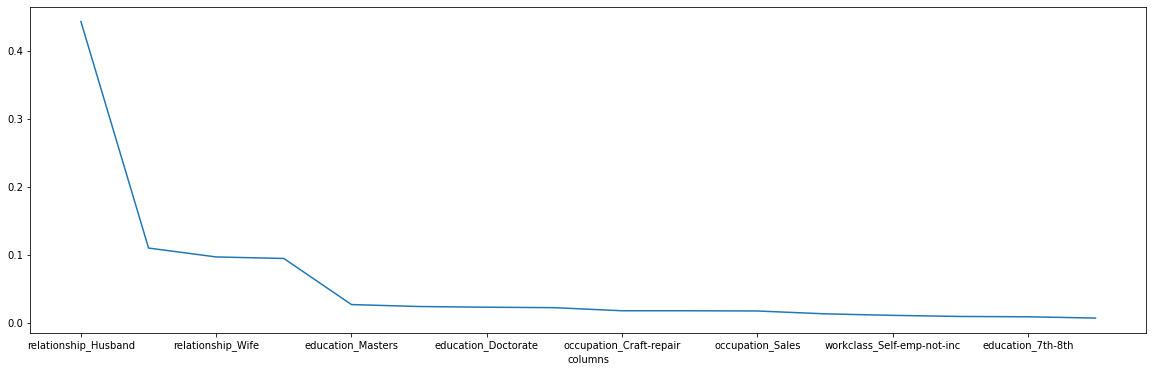

In [51]:
feature_importance.plot('columns', 'importance', figsize=(20,6), legend=False);

In [52]:
keep_columns = feature_importance[feature_importance["importance"]>0.005]["columns"]; 
len(keep_columns)

16

In [53]:
keep_columns

1             relationship_Husband
2       occupation_Exec-managerial
12               relationship_Wife
9        occupation_Prof-specialty
33               education_Masters
24             education_Bachelors
59             education_Doctorate
38           education_Prof-school
20         occupation_Craft-repair
25         occupation_Tech-support
18                occupation_Sales
11    marital-status_Never-married
3       workclass_Self-emp-not-inc
17          workclass_Self-emp-inc
34               education_7th-8th
50      occupation_Protective-serv
Name: columns, dtype: object

In [54]:
df_keep = subsample_dummies[keep_columns]
x = df_keep
y = subsample_dummies['income >50K']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,shuffle=False)

In [55]:
clf2 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
...     max_depth=1, random_state=0).fit(x_train, y_train)
clf2.score(x_test, y_test)

0.815

In [56]:
clf2.feature_importances_

array([0.47102481, 0.11719671, 0.10154018, 0.10088006, 0.02757482,
       0.02464743, 0.02341584, 0.02313448, 0.01865602, 0.01870699,
       0.01893425, 0.01509665, 0.01173595, 0.01001335, 0.00967545,
       0.00776702])

In [57]:
feature_importance = rf_feat_importance(clf2, x);
feature_importance

,columns,importance
0,relationship_Husband,0.471025
1,occupation_Exec-managerial,0.117197
2,relationship_Wife,0.101540
3,occupation_Prof-specialty,0.100880
4,education_Masters,0.027575
5,education_Bachelors,0.024647
6,education_Doctorate,0.023416
7,education_Prof-school,0.023134
10,occupation_Sales,0.018934
9,occupation_Tech-support,0.018707


In [59]:
df_keep = subsample_dummies[keep_columns]
df_keep.drop(columns=['relationship_Husband'], axis=1, inplace=True)
x = df_keep
y = subsample_dummies['income >50K']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,shuffle=False)

In [60]:
clf3 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
...     max_depth=1, random_state=0).fit(x_train, y_train)
clf3.score(x_test, y_test)

0.8041666666666667

In [61]:
clf3.feature_importances_

array([0.16908624, 0.00734027, 0.13741683, 0.04800452, 0.03932101,
       0.03890941, 0.03754937, 0.03183409, 0.03394124, 0.02881973,
       0.36760528, 0.005305  , 0.02242639, 0.01181925, 0.02062135])

In [62]:
feature_importance = rf_feat_importance(clf3, x);
feature_importance

,columns,importance
10,marital-status_Never-married,0.367605
0,occupation_Exec-managerial,0.169086
2,occupation_Prof-specialty,0.137417
3,education_Masters,0.048005
4,education_Bachelors,0.039321
5,education_Doctorate,0.038909
6,education_Prof-school,0.037549
8,occupation_Tech-support,0.033941
7,occupation_Craft-repair,0.031834
9,occupation_Sales,0.028820


In [63]:
income2.dropna(axis=0, inplace=True)

In [64]:
subsample2 = income2.loc[np.random.permutation(income2.index)[:4000]]

In [65]:
%time model = setup(data = subsample2 , target = 'income >50K', train_size=0.8, remove_outliers = True, use_gpu=True)

,Description,Value
0,session_id,7379
1,Target,income >50K
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(4000, 14)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


Wall time: 2.55 s


In [66]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,pycaret.internal.tunable.TunableMLPClassifier,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [67]:
%time compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8569,0.9113,0.6439,0.7650,0.6983,0.6055,0.6100,3.5840
lightgbm,Light Gradient Boosting Machine,0.8562,0.9080,0.6618,0.7518,0.7029,0.6088,0.6116,0.1080
gbc,Gradient Boosting Classifier,0.8539,0.9088,0.5865,0.7959,0.6737,0.5826,0.5949,0.5340
ada,Ada Boost Classifier,0.8503,0.9074,0.6324,0.7479,0.6846,0.5875,0.5915,0.2300
xgboost,Extreme Gradient Boosting,0.8493,0.9062,0.6464,0.7383,0.6882,0.5896,0.5926,1.1460
lr,Logistic Regression,0.8378,0.8985,0.6045,0.7263,0.6577,0.5528,0.5583,0.5170
rf,Random Forest Classifier,0.8359,0.8859,0.6312,0.7027,0.6645,0.5563,0.5581,0.9010
lda,Linear Discriminant Analysis,0.8273,0.8879,0.5841,0.7021,0.6358,0.5241,0.5291,0.0470
ridge,Ridge Classifier,0.8263,0.0000,0.5343,0.7243,0.6133,0.5046,0.5154,0.0200
knn,K Neighbors Classifier,0.8125,0.8368,0.5674,0.6591,0.6087,0.4865,0.4896,0.3530


Wall time: 1min 32s


In [68]:
%prun gbc = create_model('gbc', cross_validation= False)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8512,0.9117,0.5928,0.8188,0.6877,0.5933,0.6066


         198325 function calls (191646 primitive calls) in 1.056 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      100    0.516    0.005    0.516    0.005 {method 'build' of 'sklearn.tree._tree.DepthFirstTreeBuilder' objects}
        2    0.239    0.119    0.239    0.119 {built-in method gc.collect}
      786    0.019    0.000    0.049    0.000 _gb_losses.py:625(_update_terminal_region)
      100    0.016    0.000    0.019    0.000 _gb_losses.py:586(__call__)
     2337    0.011    0.000    0.011    0.000 {method 'reduce' of 'numpy.ufunc' objects}
3618/3545    0.011    0.000    0.035    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
      100    0.010    0.000    0.071    0.001 _gb_losses.py:72(update_terminal_regions)
      100    0.009    0.000    0.009    0.000 {method 'apply' of 'sklearn.tree._tree.Tree' objects}
     2460    0.008    0.000    0.008    0.000 {method 'take' of 'numpy.nda

In [69]:
subsample_dummies2 = pd.get_dummies(subsample2)

In [70]:
x = subsample_dummies2.drop(columns = 'income >50K')
y = subsample_dummies2['income >50K']

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,shuffle=False)

In [72]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
...     max_depth=1, random_state=0).fit(x_train, y_train)
clf.score(x_test, y_test)

0.8466666666666667

In [73]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'columns':df.columns, 'importance':m.feature_importances_}
                       ).sort_values('importance', ascending=False)

In [74]:
len(clf.feature_importances_)

101

In [75]:
clf.feature_importances_

array([0.03191117, 0.13559763, 0.17998638, 0.04080992, 0.02765097,
       0.00173206, 0.        , 0.        , 0.        , 0.00357121,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00722291, 0.        , 0.        , 0.        ,
       0.        , 0.00243746, 0.        , 0.        , 0.12837782,
       0.4038595 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.006652  , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01056308, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01027069,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00358252, 0.00178977, 0.00193737, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [76]:
feature_importance = rf_feat_importance(clf, x);
feature_importance

,columns,importance
30,marital-status_Married-civ-spouse,0.403859
2,capital-gain,0.179986
1,education-num,0.135598
29,marital-status_Married-AF-spouse,0.128378
3,capital-loss,0.040810
...,...,...
42,occupation_Other-service,0.000000
41,occupation_Machine-op-inspct,0.000000
40,occupation_Handlers-cleaners,0.000000
39,occupation_Farming-fishing,0.000000


In [77]:
feature_importance = feature_importance[feature_importance.importance > 0.005]

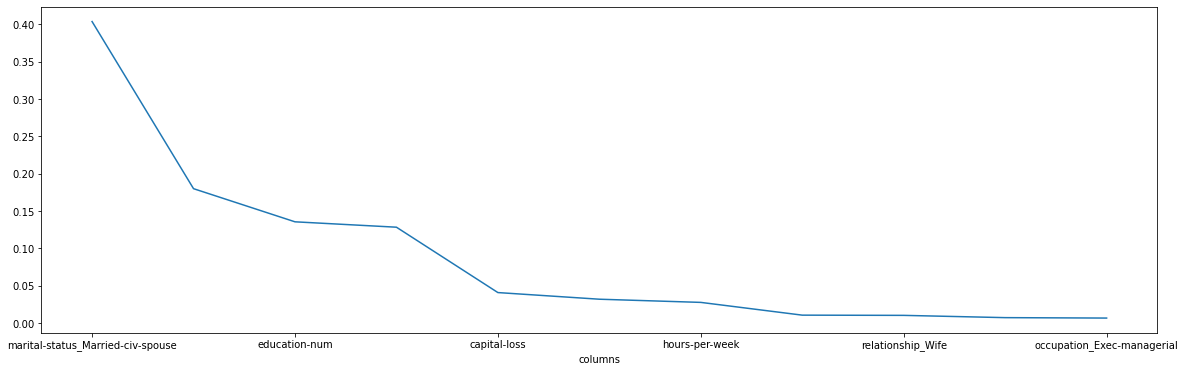

In [78]:
feature_importance.plot('columns', 'importance', figsize=(20,6), legend=False);

In [79]:
keep_columns = feature_importance[feature_importance["importance"]>0.005]["columns"]; 
len(keep_columns)

11

In [80]:
keep_columns

30    marital-status_Married-civ-spouse
2                          capital-gain
1                         education-num
29     marital-status_Married-AF-spouse
3                          capital-loss
0                                   age
4                        hours-per-week
45           occupation_Protective-serv
54                    relationship_Wife
21                  education_Bachelors
38           occupation_Exec-managerial
Name: columns, dtype: object

In [81]:
df_keep = subsample_dummies2[keep_columns]
x = df_keep
y = subsample_dummies2['income >50K']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,shuffle=False)

In [82]:
clf2 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
...     max_depth=1, random_state=0).fit(x_train, y_train)
clf2.score(x_test, y_test)

0.8466666666666667

In [83]:
clf2.feature_importances_

array([0.40561348, 0.18076807, 0.13618654, 0.13954538, 0.04067873,
       0.03204977, 0.03029862, 0.01060895, 0.0103153 , 0.00725428,
       0.00668089])

In [84]:
feature_importance = rf_feat_importance(clf2, x);
feature_importance

,columns,importance
0,marital-status_Married-civ-spouse,0.405613
1,capital-gain,0.180768
3,marital-status_Married-AF-spouse,0.139545
2,education-num,0.136187
4,capital-loss,0.040679
5,age,0.032050
6,hours-per-week,0.030299
7,occupation_Protective-serv,0.010609
8,relationship_Wife,0.010315
9,education_Bachelors,0.007254


In [85]:
df_keep = subsample_dummies2[keep_columns]
df_keep.drop(columns=['marital-status_Married-civ-spouse'], axis=1, inplace=True)
x = df_keep
y = subsample_dummies['income >50K']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,shuffle=False)

In [86]:
clf3 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
...     max_depth=1, random_state=0).fit(x_train, y_train)
clf3.score(x_test, y_test)

0.7341666666666666

In [87]:
clf3.feature_importances_

array([0.10914815, 0.08497743, 0.00370356, 0.20488246, 0.29137876,
       0.27268337, 0.        , 0.03322628, 0.        , 0.        ])

In [88]:
feature_importance = rf_feat_importance(clf3, x);
feature_importance

,columns,importance
4,age,0.291379
5,hours-per-week,0.272683
3,capital-loss,0.204882
0,capital-gain,0.109148
1,education-num,0.084977
7,relationship_Wife,0.033226
2,marital-status_Married-AF-spouse,0.003704
6,occupation_Protective-serv,0.000000
8,education_Bachelors,0.000000
9,occupation_Exec-managerial,0.000000


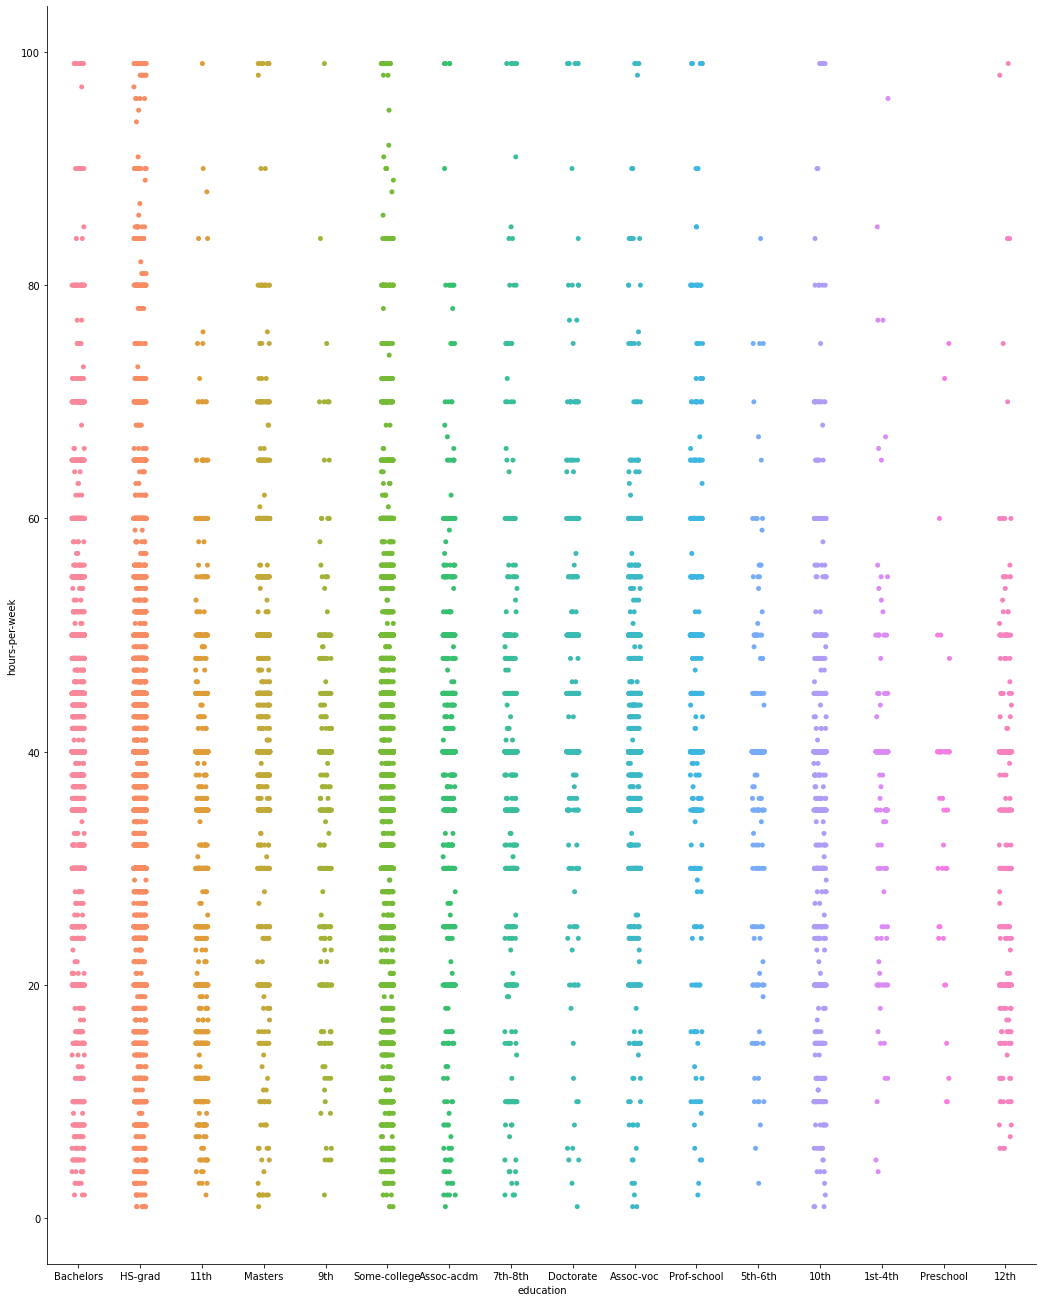

In [89]:
sns.catplot(x='education', y='hours-per-week', data=income, height=18, aspect=.8);

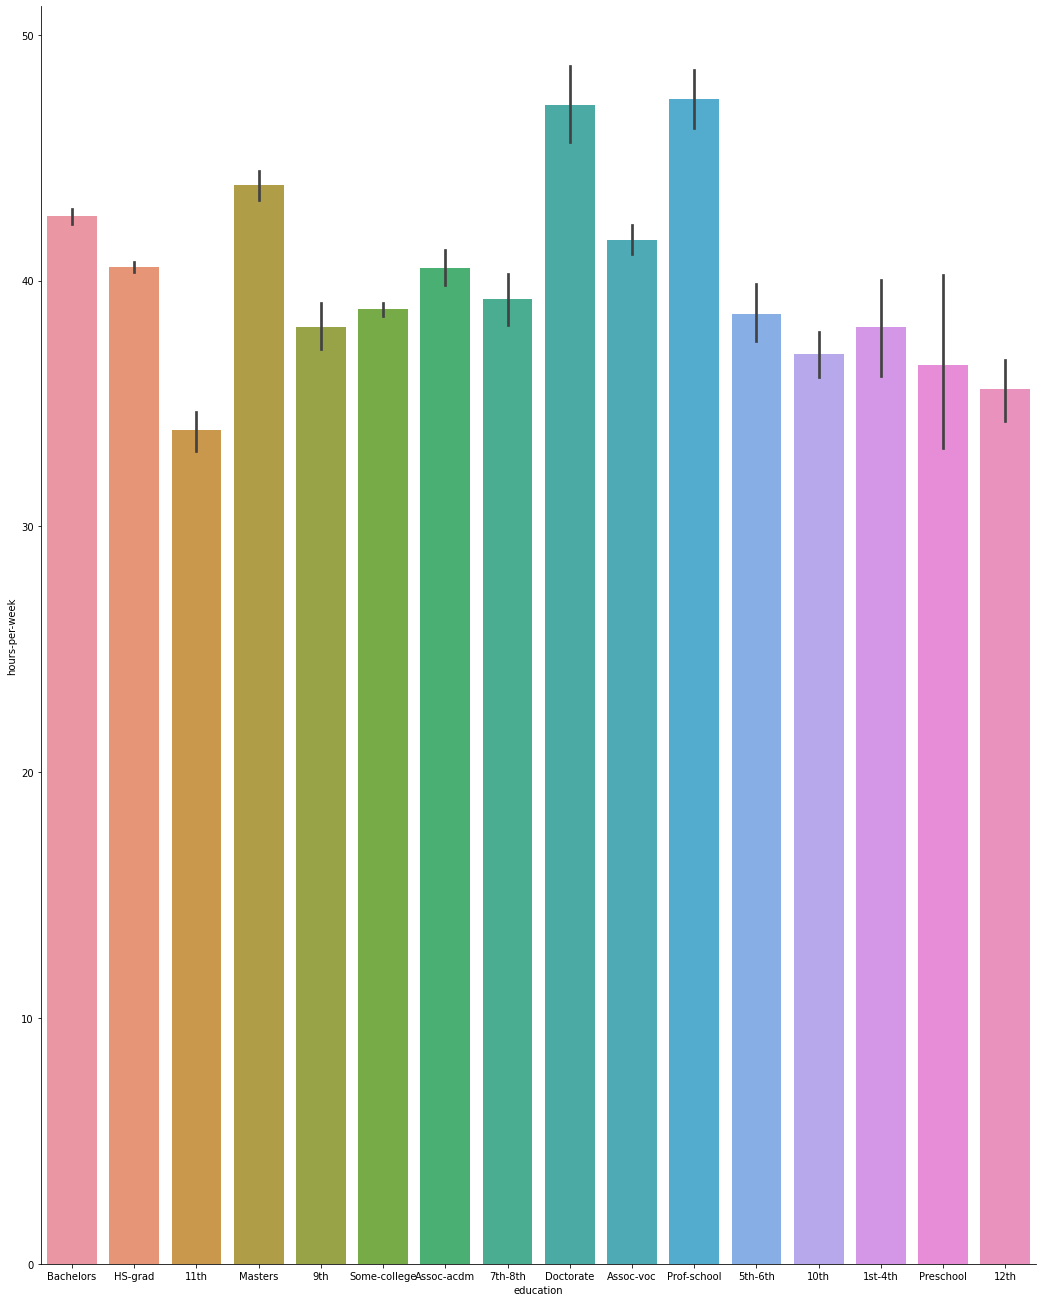

In [90]:
sns.catplot(x='education', y='hours-per-week', data=income, height=18, aspect=.8, kind="bar");

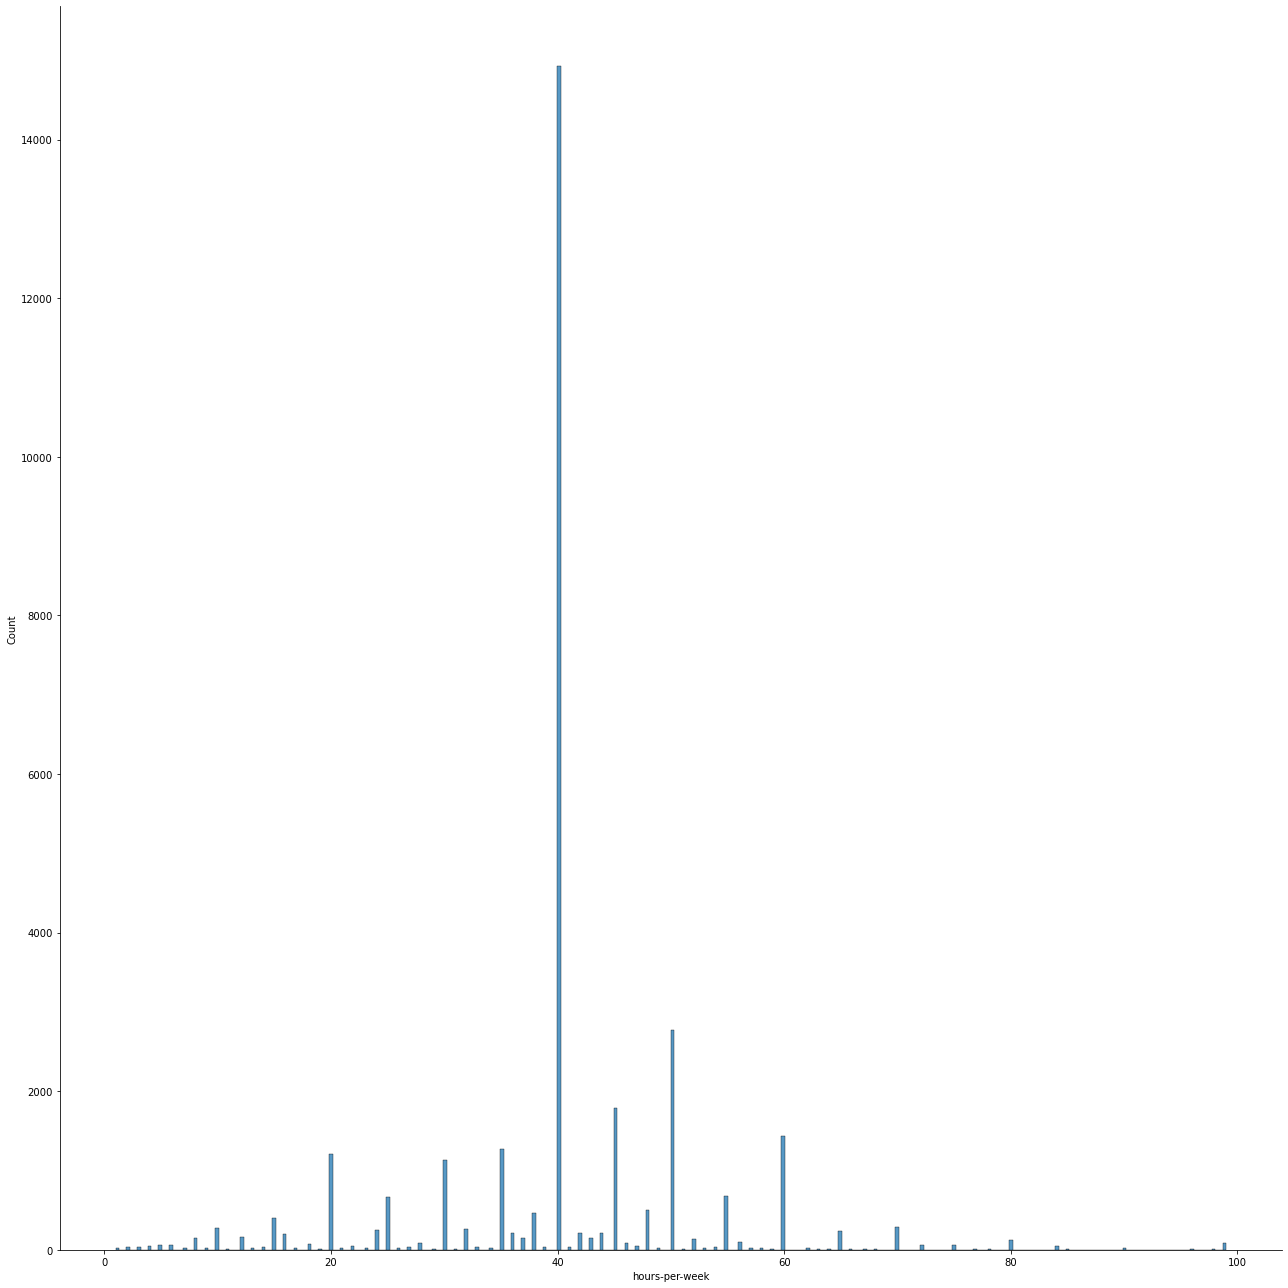

In [91]:
sns.displot(data=income,x='hours-per-week',height=18, kde=False);

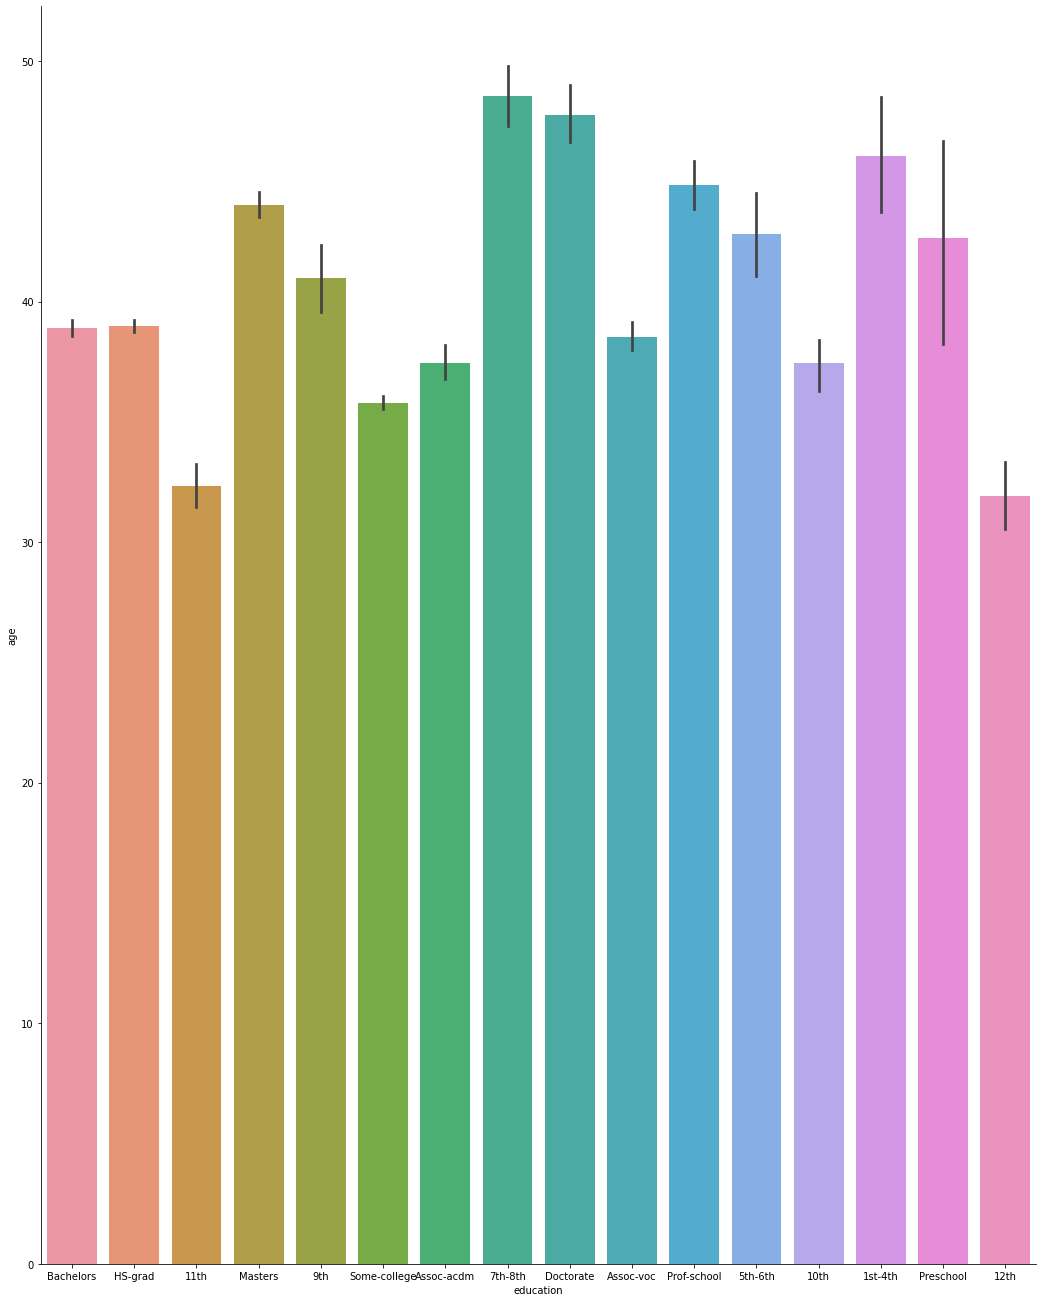

In [92]:
sns.catplot(x='education', y='age', data=income, height=18, aspect=.8, kind="bar");

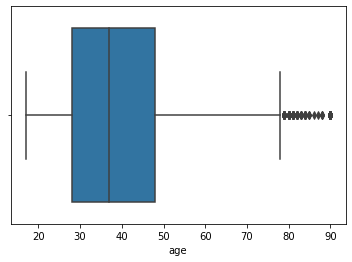

In [93]:
sns.boxplot(x=income['age']);

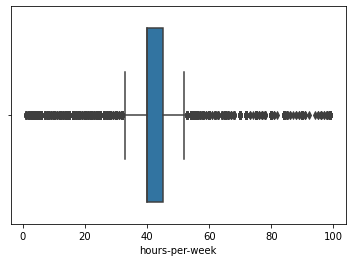

In [94]:
sns.boxplot(x=income['hours-per-week']);

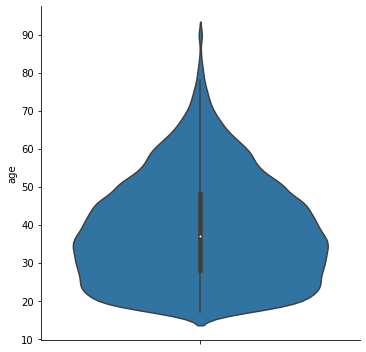

In [95]:
sns.catplot(y='age', kind='violin', data=income);

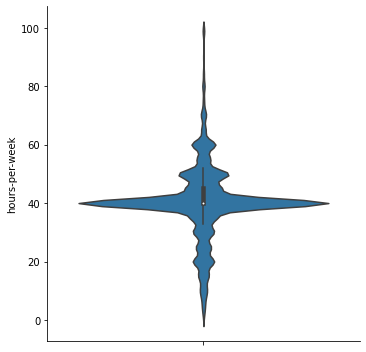

In [96]:
sns.catplot(y='hours-per-week', kind='violin', data=income);